### IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Activation,Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import os
import warnings
warnings.filterwarnings("ignore")

### LOADING TRAIN DATA

In [2]:
data = pd.read_csv(r"C:\Users\Skill-Lync\Downloads\fashion-mnist_train_Dataset_Project 1.csv\fashion-mnist_train.csv")

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(60000, 785)

### CREATING DATA1 IN ORDER TO VISUALIZE

In [5]:
data1 = data[["label"]]

In [6]:
data1['pixels'] = data[data.columns[1:]].apply(lambda x: ' '.join(x.astype(str)),axis=1)

In [7]:
data1

,label,pixels
0,2,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,9,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,6,0 0 0 0 0 0 0 5 0 0 0 105 92 101 107 100 132 0...
3,0,0 0 0 1 2 0 0 0 0 0 114 183 112 55 23 72 102 1...
4,3,0 0 0 0 0 0 0 0 0 0 0 0 46 0 21 68 0 0 0 0 0 0...
...,...,...
59995,9,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
59996,1,0 0 0 0 0 0 0 0 0 0 83 155 136 116 148 110 118...
59997,8,0 0 0 0 0 0 0 0 0 0 1 0 0 87 114 77 0 4 0 0 0 ...
59998,8,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [9]:
cloth_map = {0:"T-shirt/top",1:"Trouser", 2:"Pullover",3:"Dress" ,4:"Coat",
              5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
cloth_counts = data1["label"].value_counts(sort=False).reset_index()
cloth_counts.columns = ["cloth_type" , "count"]
cloth_counts["cloth_type"] = cloth_counts["cloth_type"].map(cloth_map)
cloth_counts

,cloth_type,count
0,Pullover,6000
1,Ankle boot,6000
2,Shirt,6000
3,T-shirt/top,6000
4,Dress,6000
5,Coat,6000
6,Sandal,6000
7,Bag,6000
8,Sneaker,6000
9,Trouser,6000


In [18]:
def row2image(row):
    pixels , cloth = row["pixels"],cloth_map[row["label"]]
    img = np.array(pixels.split())
    img = img.reshape(28,28)
    image = np.zeros((28,28,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img  
    return np.array([image.astype(int),cloth])

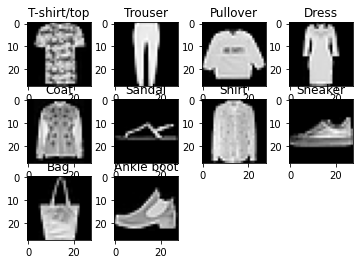

In [11]:
for i in range(1,11):
    face = data1[data1["label"]==i-1].iloc[0]
    img = row2image(face)
    plt.subplot(3,4,i)
    plt.imshow(img[0])
    plt.title(img[1])
plt.show()  

### NOW AGAIN USING DATA 

In [20]:
x = data.drop("label",axis=1)
y = data.label

In [22]:
x.shape

(60000, 784)

### RESHAPING AND CONVERTING IT TO ARRAY

In [24]:
x_standard = []  
for i in range(0,x.shape[0]):
    x_standard.append(x.iloc[i,:].values.reshape(28,28)/255)

### CONVERTING TARGET INTO CATAGORICAL FORM

In [25]:
num_classes = 10
x_train = np.array(x_standard)
y_train = to_categorical(y,num_classes)

### MODEL CREATION

In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add((Conv2D(64,(3,3), activation = 'relu')))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [27]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

### MODEL BUILDING

In [28]:
history= model.fit(x_train, y_train,epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 49s 25ms/step - loss: 0.4960 - accuracy: 0.8189
Epoch 2/7
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3213 - accuracy: 0.8834
Epoch 3/7
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2753 - accuracy: 0.8996
Epoch 4/7
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2444 - accuracy: 0.9087
Epoch 5/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2181 - accuracy: 0.9189
Epoch 6/7
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1974 - accuracy: 0.9263
Epoch 7/7
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1817 - accuracy: 0.9315


* So model is trained on 93% of accuracy

### NOW TESTING ON TEST DATA

In [29]:
test_data = pd.read_csv(r"C:\Users\Skill-Lync\Downloads\fashion-mnist_test__Dataset_Project 1_.csv\fashion-mnist_test.csv")

In [30]:
x_test = test_data.drop("label",axis=1)
y_test = test_data.label

### RESHAPING THE TEST DATA

* Pixels are already splitted so no need to split.

In [31]:
x_test_standard = []  
for i in range(0,x_test.shape[0]):
    x_test_standard.append(x_test.iloc[i,:].values.reshape(28,28)/255)

### CONVERTING INPUT TO ARRAY AND OUTPUT TO CATAGORICAL

In [32]:
x_test = np.array(x_test_standard)
y_test = to_categorical(y_test)

### LETS SEE HOW OUR MODEL WORKING ON TEST DATA

In [33]:
test_history = model.fit(x_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.2340 - accuracy: 0.9156


* Its working very good on testing data.
* We successfully able to get 91% of accuracy.

IF WE SEE TRAINING AND TESTING ACCURACY THERE IS NOT MUCH DIFFERENCE BETWEEN THEM, HENCE , WE CAN SAY THAT MODEL IS NEITHER OVERFITTED NOR UNDERFITTED

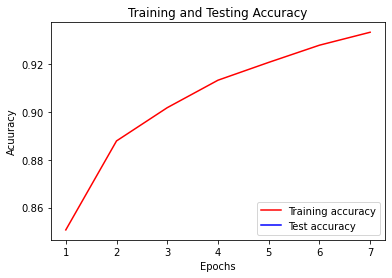

In [26]:
accuracy = history.history['accuracy']
test_accuracy = test_history.history['accuracy']
epochs = range(1,len(accuracy)+1)
epochs_test = 1


plt.plot(epochs,accuracy,"r",label = "Training accuracy")
plt.plot(epochs_test,test_accuracy,"b",label="Test accuracy")
plt.title("Training and Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acuuracy")
plt.legend()
plt.show()

### PREDICTION

In [27]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


### PREDICTION PROOF

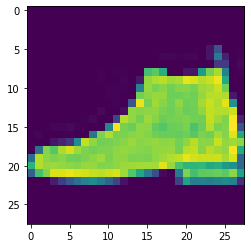

In [28]:
plt.imshow(x_test[100])

In [29]:
print(np.argmax(pred[100]))

9


In [30]:
proof = pd.DataFrame({0:["T-shirt/top"],1:["Trouser"], 2:["Pullover"],3:["Dress"] ,4:["Coat"],
              5:["Sandal"], 6:["Shirt"], 7:["Sneaker"], 8:["Bag"], 9:["Ankle boot"]})

In [31]:
proof

,0,1,2,3,4,5,6,7,8,9
0,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot


### CONCLUSION
* Now it can be seen that when we print the x_test value[100] that returns the image of Ankle boot.
* After that we checked the index of same pred value[100].
* Now the index is 9.
* Finally , if we see on the dataframe(proof) then (th index is representing to "Ankle boot ".
* So , it means our is well trained and able to return the right value of prediction